In [1]:
import pandas as pd
import numpy as np
# from pandas_datareader import data as pdr
# import datetime as dt
import matplotlib.pyplot as plt
import random 

from functions import join_stocks_crypto, generate_rand_portfolios

c:\Users\Kirill\Documents\Projects\thesis\venv312\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
df_all_stocks = pd.read_csv('stocks_data.csv',index_col='Date')
cryptos_df = pd.read_csv('cryptos_data.csv', index_col='Date')

joined_df = join_stocks_crypto(cryptos_df, df_all_stocks, mode = 'stocks_left') #mode - either do left with crypto and fill NA for stocks or do left on stocks and leave out some dates for cryptos
joined_df.index = pd.to_datetime(joined_df.index)

In [3]:
tickers = list(df_all_stocks.columns)

random.seed(42)
random_portfolios = generate_rand_portfolios(n_reps=1000, n_stocks=15, tickers=tickers)

In [ ]:
returns_all = df_all_stocks.pct_change()
portfolio = random_portfolios['portfolio_0']



returns_portfolio = returns_all[list(portfolio.keys())]

# mean_returns = returns_portfolio.mean()
# cov_matrix = returns_portfolio.cov()

# weights = [v for k, v in portfolio.items()]


In [13]:
def run_simulation(portfolio_dict:dict, returns_for_portfolio:pd.DataFrame, n_sims=100, t=100, distribution_model='multivar_norm', plot=False, initialPortfolio=100):
    mean_returns = returns_for_portfolio.mean()
    cov_matrix = returns_for_portfolio.cov()

    weights = [v for _, v in portfolio_dict.items()]

    meanM = np.tile(mean_returns, (t, 1))  # Shape: (T, n_assets)

    portfolio_sims = np.zeros((t, n_sims))

    L = np.linalg.cholesky(cov_matrix)  # Cholesky decomposition outside the loop

    for sim in range(n_sims):
        Z = np.random.normal(size=(t, len(portfolio_dict)))  # Shape: (T, n_assets)
        daily_returns = meanM + Z @ L.T  # Shape: (T, n_assets)

        portfolio_returns = daily_returns @ weights  # Shape: (T,)
        portfolio_sims[:, sim] = np.cumprod(1 + portfolio_returns) * initialPortfolio

    if plot:
        plt.plot(portfolio_sims)
        plt.title("Monte Carlo Simulated Portfolio Paths")
        plt.xlabel("Days")
        plt.ylabel("Portfolio Value")
        plt.show()

    return portfolio_sims

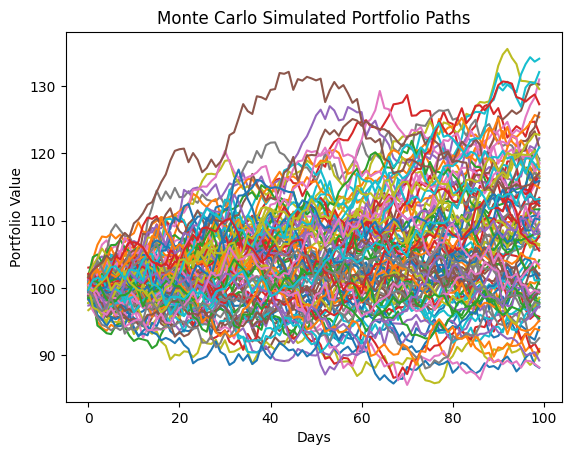

array([[100.42347537,  98.49407577, 101.60879203, ...,  99.4708421 ,
         99.99346277,  99.75916129],
       [101.84778207,  97.86178178, 100.96129006, ...,  98.85070133,
         99.5343365 , 101.17488352],
       [ 99.99835301,  95.74283919, 100.85735843, ...,  97.26348743,
        100.35681661, 101.54217729],
       ...,
       [ 99.23712375,  91.45886589, 117.85260107, ...,  96.69574525,
        121.9439112 , 114.0446184 ],
       [ 98.4135652 ,  89.86844331, 117.33484386, ...,  97.93762168,
        122.92039946, 113.11654408],
       [ 99.60338937,  90.97029828, 116.33487877, ...,  97.69268934,
        122.75079409, 113.23634558]], shape=(100, 100))

In [14]:
run_simulation(portfolio, returns_portfolio, n_sims=100, t=100, distribution_model='multivar_norm', plot=True)

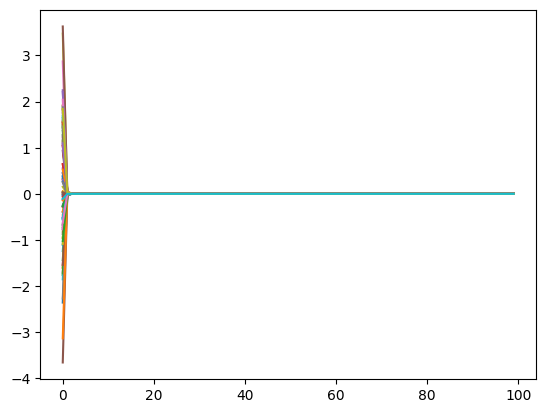

In [ ]:
#ORIGINAL CODE

# n_sims = 100
# T = 100

# meanM = np.full(shape=(T, len(portfolio)), fill_value=mean_returns)
# meanM = meanM.T


# portfolio_sims = np.full(shape=(T, n_sims), fill_value=0.0)
# initialPortfolio = 100

# for sim in range(0, n_sims):
#     Z = np.random.normal(size=(T, len(portfolio)))
#     L = np.linalg.cholesky(cov_matrix)
#     daily_returns = meanM + np.inner(L, Z)

#     portfolio_sims[:, sim] = np.cumprod(np.inner(weights, daily_returns.T)) * initialPortfolio

# plt.plot(portfolio_sims)
# plt.show()
